## Single Linear Regression by using the Python Fucntions Manually Implementing the Linear Regression

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### Taking simple Data set for easy understand the Mathematical equations behind the Linear Regression Algorithm

In [71]:
# Dataset
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]
n = len(x)

### Creating the function for mathematical compute sums for least squares

In [73]:

def compute_sums(x, y):
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(xi * yi for xi, yi in zip(x, y))
    sum_x2 = sum(xi * xi for xi in x)
    return sum_x, sum_y, sum_xy, sum_x2

### Function to compute m and c using least squares (y = mx + c)

In [75]:

def least_squares(x, y):
    sum_x, sum_y, sum_xy, sum_x2 = compute_sums(x, y)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    c = (sum_y - m * sum_x) / n
    return m, c

### Function to compute cost function J(m, c)

In [77]:

def cost_function(x, y, m, c):
    total_error = sum((yi - (m * xi + c)) ** 2 for xi, yi in zip(x, y))
    return total_error / n

### Function to compute gradients for m and c

In [79]:

def compute_gradients(x, y, m, c):
    grad_m = -2 / n * sum(xi * (yi - (m * xi + c)) for xi, yi in zip(x, y))
    grad_c = -2 / n * sum(yi - (m * xi + c) for xi, yi in zip(x, y))
    return grad_m, grad_c

### Function to perform gradient descent

In [81]:

def gradient_descent(x, y, m_init, c_init, alpha, iterations):
    m, c = m_init, c_init
    m_history = [m]
    c_history = [c]
    cost_history = [cost_function(x, y, m, c)]
    
    for _ in range(iterations):
        grad_m, grad_c = compute_gradients(x, y, m, c)
        m -= alpha * grad_m
        c -= alpha * grad_c
        m_history.append(m)
        c_history.append(c)
        cost_history.append(cost_function(x, y, m, c))
    
    return m, c, m_history, c_history, cost_history

### Compute least squares solution

In [83]:

m_ls, c_ls = least_squares(x, y)
print(f"Least Squares: m = {m_ls:.4f}, c = {c_ls:.4f}")

Least Squares: m = 2.0000, c = 0.0000


### Perform gradient descent

In [85]:

m_init, c_init = 0.5, 0.5
alpha = 0.01
iterations = 100
m_gd, c_gd, m_history, c_history, cost_history = gradient_descent(x, y, m_init, c_init, alpha, iterations)
print(f"Gradient Descent: m = {m_gd:.4f}, c = {c_gd:.4f}")

Gradient Descent: m = 1.7718, c = 0.6709


### Plot 1: Data points and best-fit line

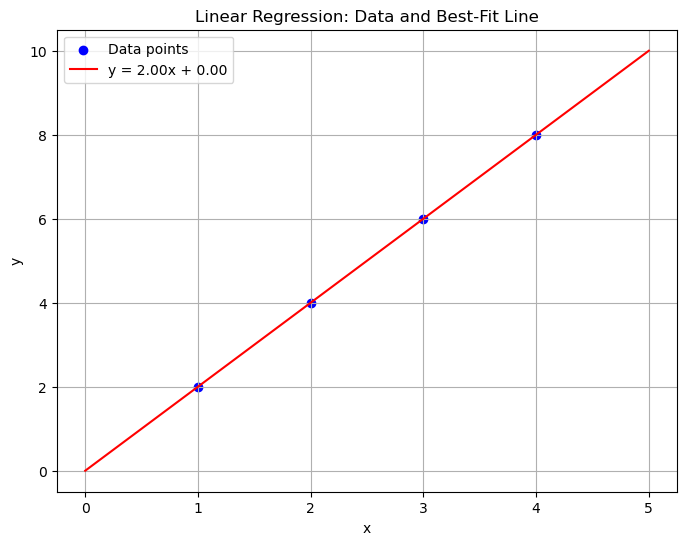

In [87]:

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
x_line = np.array([0, 5])
y_line = m_ls * x_line + c_ls
plt.plot(x_line, y_line, color='red', label=f'y = {m_ls:.2f}x + {c_ls:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: Data and Best-Fit Line')
plt.legend()
plt.grid(True)
#plt.savefig('linear_regression_fit.png')
plt.show()
plt.close()

### Plot 2: Cost function J(m, c)

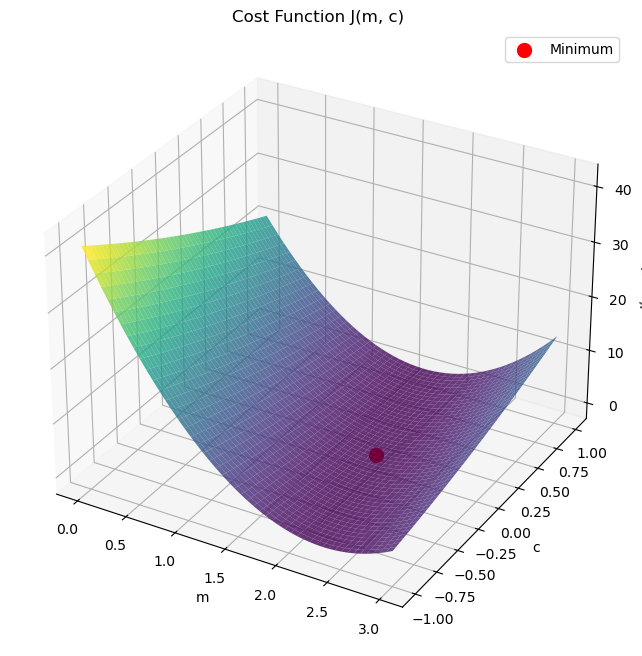

In [89]:

m_values = np.linspace(0, 3, 50)
c_values = np.linspace(-1, 1, 50)
M, C = np.meshgrid(m_values, c_values)
J = np.zeros_like(M)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        J[i, j] = cost_function(x, y, M[i, j], C[i, j])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, C, J, cmap='viridis', alpha=0.8)
ax.scatter([m_ls], [c_ls], [cost_function(x, y, m_ls, c_ls)], color='red', s=100, label='Minimum')
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('J(m, c)')
ax.set_title('Cost Function J(m, c)')
ax.legend()
#plt.savefig('cost_function.png')
plt.show()
plt.close()

### Plot 3: Gradient descent path on cost function

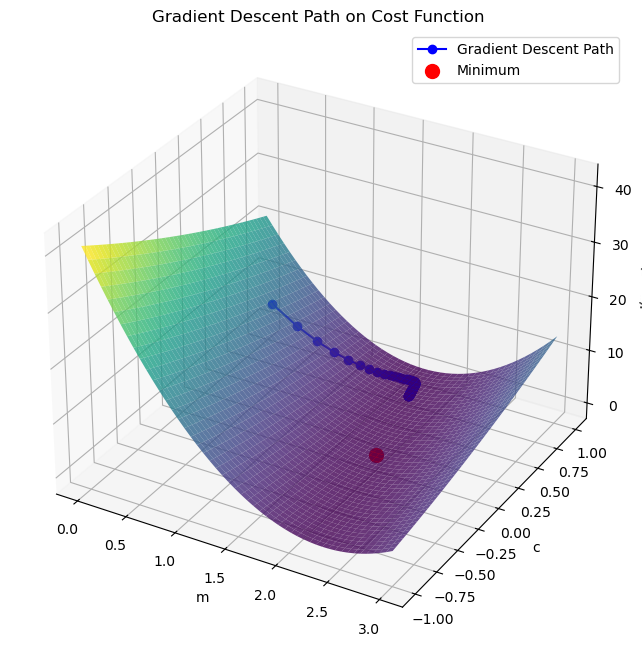

In [91]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, C, J, cmap='viridis', alpha=0.8)
ax.plot(m_history, c_history, cost_history, 'o-', color='blue', label='Gradient Descent Path')
ax.scatter([m_ls], [c_ls], [cost_function(x, y, m_ls, c_ls)], color='red', s=100, label='Minimum')
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('J(m, c)')
ax.set_title('Gradient Descent Path on Cost Function')
ax.legend()
#plt.savefig('gradient_descent_path.png')
plt.show()
plt.close()